In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

# Creating Prediction Model based on existing Clients

In [2]:
# Reading the training data

df = pd.read_csv('Credit_data.csv')
df.T.head(50)

,0,1,2,3,4,5,6,7,8,9,...,23990,23991,23992,23993,23994,23995,23996,23997,23998,23999
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,23991.0,23992.0,23993.0,23994.0,23995.0,23996.0,23997.0,23998.0,23999.0,24000.0
LIMIT_BAL,20000.0,90000.0,50000.0,50000.0,50000.0,100000.0,140000.0,20000.0,200000.0,260000.0,...,250000.0,150000.0,140000.0,10000.0,100000.0,80000.0,150000.0,30000.0,80000.0,50000.0
SEX,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,1.0,...,1.0,1.0,2.0,3.0,1.0,2.0,3.0,2.0,3.0,2.0
MARRIAGE,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0
AGE,24.0,34.0,37.0,57.0,37.0,23.0,28.0,35.0,34.0,51.0,...,34.0,35.0,41.0,43.0,38.0,34.0,43.0,37.0,41.0,46.0
PAY_1,2.0,0.0,0.0,-1.0,0.0,0.0,0.0,-2.0,0.0,-1.0,...,0.0,-1.0,0.0,0.0,0.0,2.0,-1.0,4.0,1.0,0.0
PAY_2,2.0,0.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,-1.0,...,0.0,-1.0,0.0,0.0,-1.0,2.0,-1.0,3.0,-1.0,0.0
PAY_3,-1.0,0.0,0.0,-1.0,0.0,-1.0,2.0,-2.0,2.0,-1.0,...,0.0,-1.0,0.0,0.0,-1.0,2.0,-1.0,2.0,0.0,0.0
PAY_4,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,-1.0,...,0.0,-1.0,0.0,-2.0,0.0,2.0,-1.0,-1.0,0.0,0.0


In [3]:
# Inspecting the data

print(df.shape)
print('----------------')
print(df.describe())
print('----------------')
print(df.info())

(24000, 25)
----------------
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  24000.000000    24000.000000  24000.000000  24000.000000  24000.000000   
mean   12000.500000   167876.403333      1.600917      1.850958      1.553000   
std     6928.347566   129907.454723      0.489720      0.787361      0.521331   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     6000.750000    50000.000000      1.000000      1.000000      1.000000   
50%    12000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    18000.250000   240000.000000      2.000000      2.000000      2.000000   
max    24000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_1         PAY_2         PAY_3         PAY_4  \
count  24000.000000  24000.000000  24000.000000  24000.000000  24000.000000   
mean      35.446708     -0.023875     -0.140500     -0.170000     -0.221500   
std 

## Pre-prossesing the data

- After inspection in the data it can be noticed that in the column EDUCATION the values for Unknown info are represented with 3 different numbers: 0,5,6. In order to reduce the number of categories the values of 5 and 6 were replaced by 0.
- Also the column SEX provides a binary information about the Gender of the client, taking Values 1, 2. In order for the values to be in range 0 to 1 without losing any information, the value 1 was subtracted. Now, Males are represented with 0 and Females with 1.

In [4]:
# Replacing the values of 5,6 in Education column with 0 because they denote the same Unknown info 

print('Before replace:' , df['EDUCATION'].unique())
df['EDUCATION'].replace({5 : 0, 6 : 0}, inplace=True)
print('After replace:', df['EDUCATION'].unique())

# Making the values of Sex 0 and 1
print('Before reduction:' , df['SEX'].unique())
df['SEX'] = df['SEX']- 1
print('After reduction:', df['SEX'].unique())

Before replace: [2 1 3 5 4 6 0]
After replace: [2 1 3 0 4]
Before reduction: [2 1]
After reduction: [1 0]


In columns PAY_1 to PAY_6 represented the repayment status of each client from 1 to 6 months prior to October respectively. It can be seen that the values from -2 to 0 represent different categories of clients and form 1 to 9 represent the months that a client delay hos payments. To separate then the categorical values from the numerical, two new columns were created for each column PAY.
- PAY_CATEGORY represents the same categorical values from -2 to 0. In addition, a new category was add from the clients that were delayed. These clients are represented with the value of 1.
- DELAY represents the months of delay for each client, captured by the numerical values from 1 to 9. Moreover, the value 0 was added for the non - delayed clients (with values -2, -1, 0).  

In [5]:
# Separating the categorical, and numirical values in columns PAY

for i in range(1,7):
    column = 'PAY_'+str(i)
    ncol = 'DELAY_'+str(i)

    col_num = df[column]
    col_num = col_num.replace({-2: 0, -1: 0})
    NUM = pd.DataFrame(list(col_num), columns=[ncol])
    col_cat = df[column]
    col_cat = col_cat.replace({2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})
    CAT = pd.DataFrame(list(col_cat), columns=[column+'_CATEGORY'])
    if i==1:
        dfNew = pd.concat([NUM,CAT], axis=1)
    else:
        temp = pd.concat([NUM,CAT], axis=1)
        dfNew = pd.concat([dfNew, temp], axis=1)

df = pd.concat([df, dfNew], axis=1)
df = df.drop(['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)

- For the columns having more than two or more categorical values, dummy variables were created.

In [6]:
# Creating Dummies for categorical variables

df = pd.get_dummies(df,drop_first=True,columns=['EDUCATION','MARRIAGE'])
df = pd.get_dummies(df,drop_first=True,columns=['PAY_1_CATEGORY','PAY_2_CATEGORY','PAY_3_CATEGORY',
                                                'PAY_4_CATEGORY','PAY_5_CATEGORY','PAY_6_CATEGORY'])

In [7]:
df.shape

(24000, 48)

In [8]:
# Searching for missing values

df.isnull().sum()

ID                   0
LIMIT_BAL            0
SEX                  0
AGE                  0
BILL_AMT1            0
BILL_AMT2            0
BILL_AMT3            0
BILL_AMT4            0
BILL_AMT5            0
BILL_AMT6            0
PAY_AMT1             0
PAY_AMT2             0
PAY_AMT3             0
PAY_AMT4             0
PAY_AMT5             0
PAY_AMT6             0
default_0            0
DELAY_1              0
DELAY_2              0
DELAY_3              0
DELAY_4              0
DELAY_5              0
DELAY_6              0
EDUCATION_1          0
EDUCATION_2          0
EDUCATION_3          0
EDUCATION_4          0
MARRIAGE_1           0
MARRIAGE_2           0
MARRIAGE_3           0
PAY_1_CATEGORY_-1    0
PAY_1_CATEGORY_0     0
PAY_1_CATEGORY_1     0
PAY_2_CATEGORY_-1    0
PAY_2_CATEGORY_0     0
PAY_2_CATEGORY_1     0
PAY_3_CATEGORY_-1    0
PAY_3_CATEGORY_0     0
PAY_3_CATEGORY_1     0
PAY_4_CATEGORY_-1    0
PAY_4_CATEGORY_0     0
PAY_4_CATEGORY_1     0
PAY_5_CATEGORY_-1    0
PAY_5_CATEG

- One of the basic assumptions that must be met for logistic regression is the absence of multicollinearity. For these reason highly correlated features need to be excluded from the data.

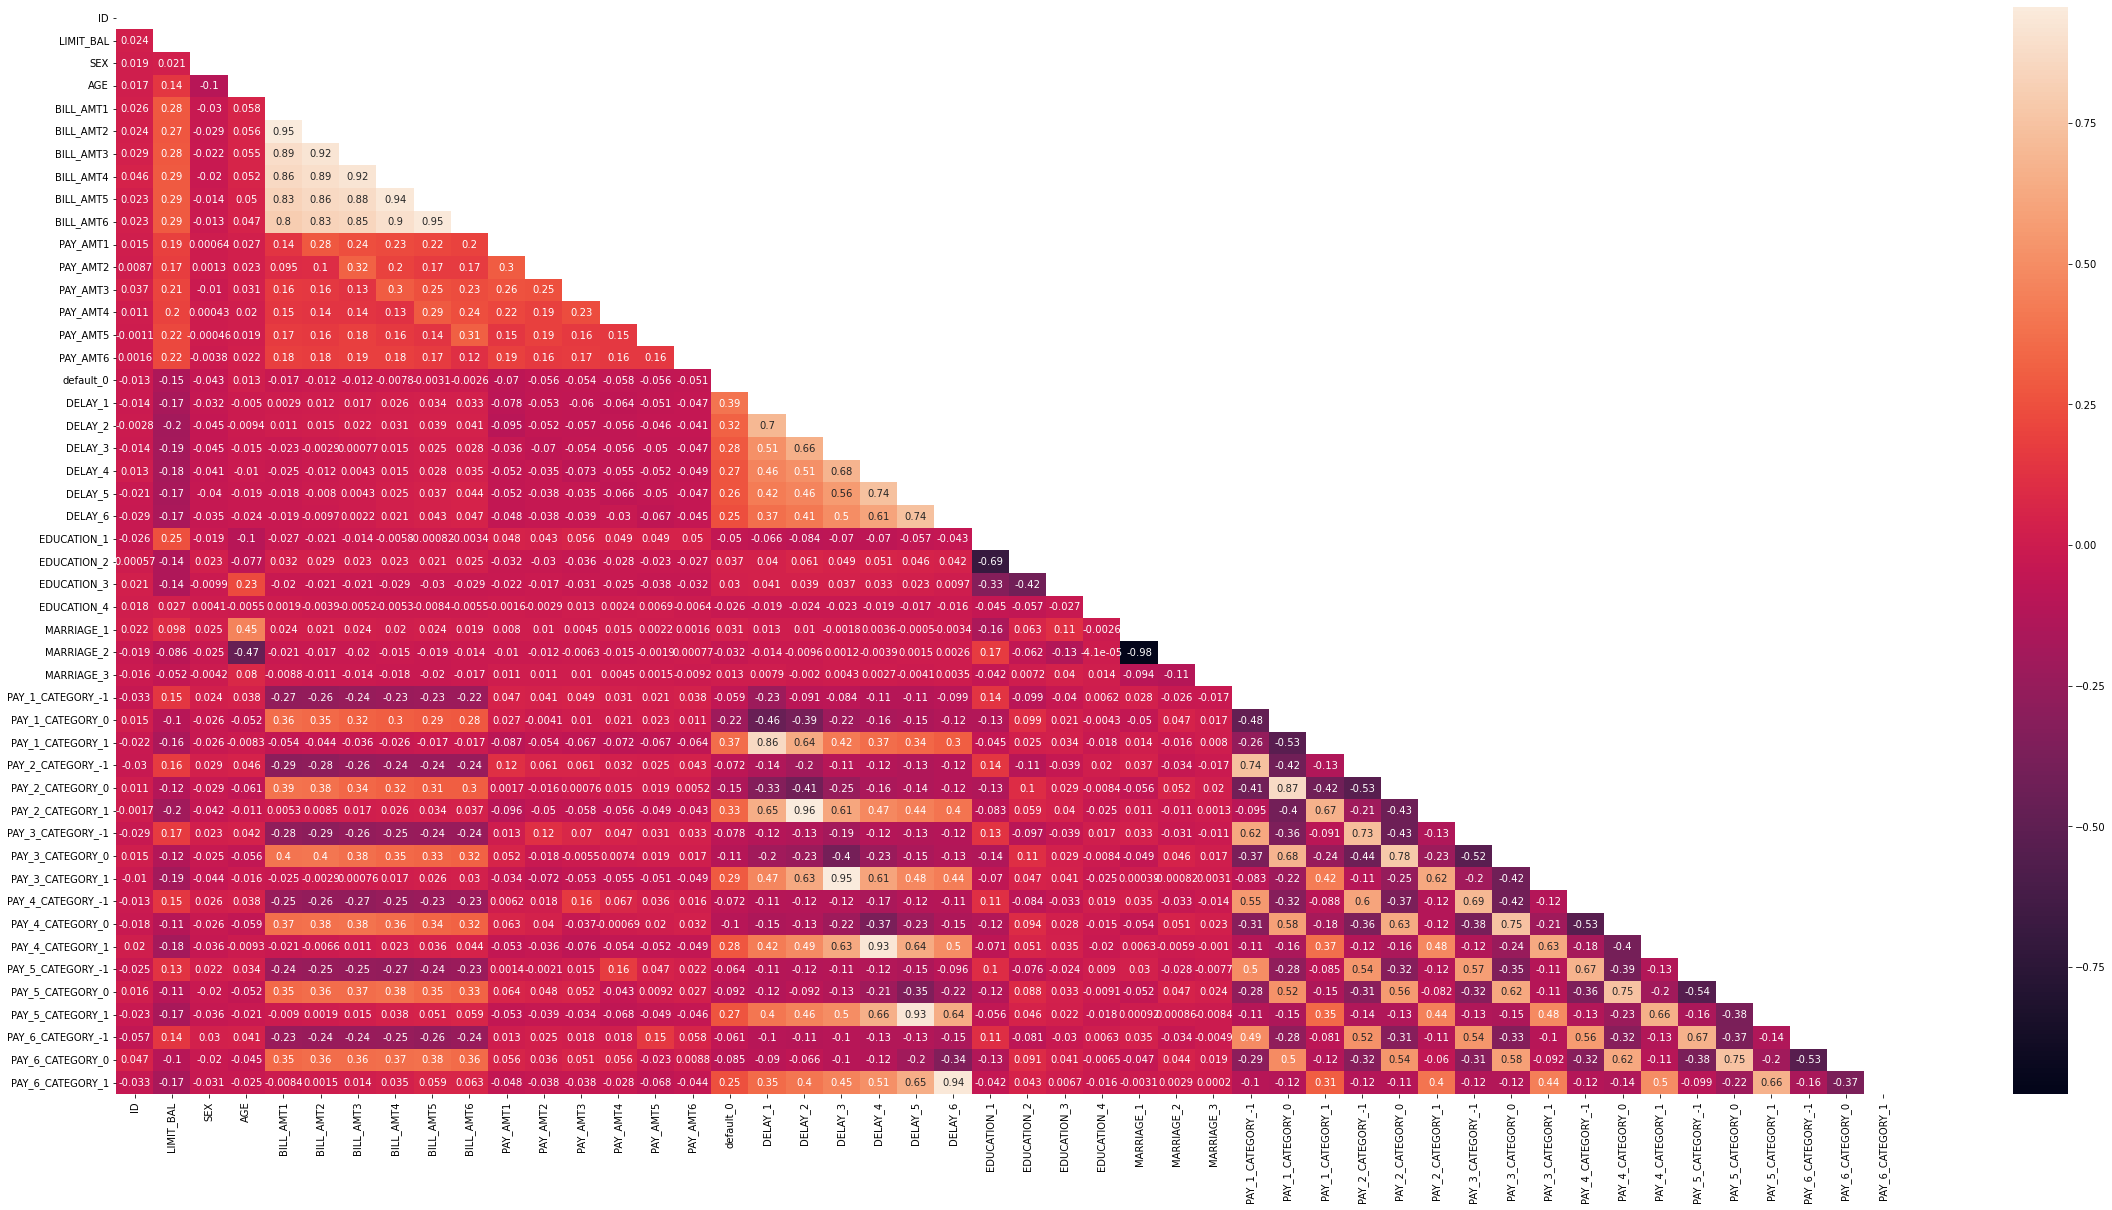

In [9]:
# Checking for high correlation between the variables

plt.figure(figsize=(40,20))

correlation_matrix = df.corr()

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix, annot=True, mask=mask)
plt.show()

In [10]:
# Excluding highly correlated Variables

ex_var = ['BILL_AMT2','BILL_AMT4','BILL_AMT6','BILL_AMT3',
          'MARRIAGE_2','PAY_2_CATEGORY_1','PAY_3_CATEGORY_1',
          'PAY_6_CATEGORY_1','PAY_4_CATEGORY_1','PAY_5_CATEGORY_1',
          'BILL_AMT6','BILL_AMT5','PAY_1_CATEGORY_1','PAY_2_CATEGORY_0']

In [11]:
temp = df.drop(ex_var, axis=1)

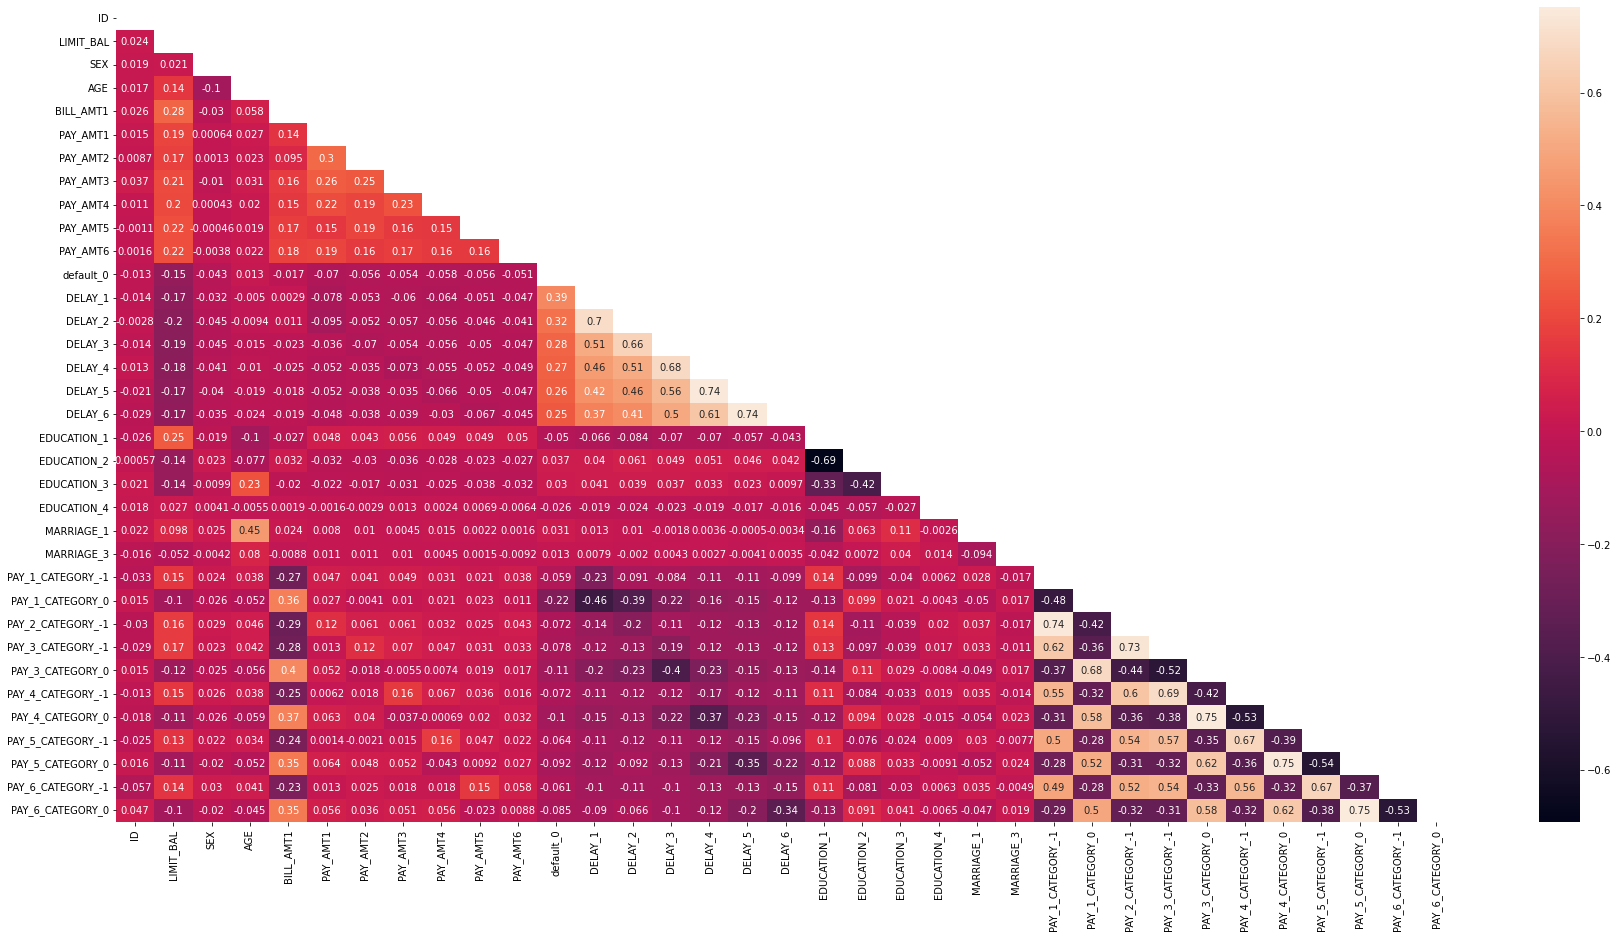

In [12]:
# Checking if there is any high correlation between the variables after the exclution.

plt.figure(figsize=(30,15))

correlation_matrix = temp.corr()

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix, annot=True, mask=mask)
plt.show()

In [13]:
# Updating the dataset 
df = temp

In [14]:
df.T.head(50)

,0,1,2,3,4,5,6,7,8,9,...,23990,23991,23992,23993,23994,23995,23996,23997,23998,23999
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,23991.0,23992.0,23993.0,23994.0,23995.0,23996.0,23997.0,23998.0,23999.0,24000.0
LIMIT_BAL,20000.0,90000.0,50000.0,50000.0,50000.0,100000.0,140000.0,20000.0,200000.0,260000.0,...,250000.0,150000.0,140000.0,10000.0,100000.0,80000.0,150000.0,30000.0,80000.0,50000.0
SEX,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGE,24.0,34.0,37.0,57.0,37.0,23.0,28.0,35.0,34.0,51.0,...,34.0,35.0,41.0,43.0,38.0,34.0,43.0,37.0,41.0,46.0
BILL_AMT1,3913.0,29239.0,46990.0,8617.0,64400.0,11876.0,11285.0,0.0,11073.0,12261.0,...,279640.0,3425.0,138325.0,8802.0,3042.0,72557.0,1683.0,3565.0,-1645.0,47929.0
PAY_AMT1,0.0,1518.0,2000.0,2000.0,2500.0,380.0,3329.0,0.0,2306.0,21818.0,...,65000.0,9054.0,6000.0,2000.0,2000.0,7000.0,1837.0,0.0,85900.0,2078.0
PAY_AMT2,689.0,1500.0,2019.0,36681.0,1815.0,601.0,0.0,0.0,12.0,9966.0,...,8800.0,0.0,7000.0,0.0,111784.0,3500.0,3526.0,0.0,3409.0,1800.0
PAY_AMT3,0.0,1000.0,1200.0,10000.0,657.0,0.0,432.0,0.0,50.0,8583.0,...,9011.0,783.0,4228.0,0.0,4000.0,0.0,8998.0,22000.0,1178.0,1430.0
PAY_AMT4,0.0,1000.0,1100.0,9000.0,1000.0,581.0,1000.0,13007.0,300.0,22301.0,...,6000.0,0.0,1505.0,0.0,3000.0,7000.0,129.0,4200.0,1926.0,1000.0
PAY_AMT5,0.0,1000.0,1069.0,689.0,1000.0,1687.0,1000.0,1122.0,3738.0,0.0,...,7000.0,0.0,2000.0,0.0,2000.0,0.0,0.0,2000.0,52964.0,1000.0


## Building the model

In [15]:
# Taking as indepentent variables all the Variables exept from ID and defualt_0

Y = df[['default_0']]
X = df.drop(['ID','default_0'], axis=1)

In [16]:
# Spliting the data to test set and other (test 20%)
TrainX, OtherX, TrainY, OtherY = train_test_split(X,Y, test_size=0.40, random_state=567)

# Spliting the data to training and validation set 
ValidationX, TestX, ValidationY, TestY = train_test_split(OtherX, OtherY, test_size=0.50, random_state=567)

In [17]:
print('Percentage of Default in the Train set:', np.count_nonzero(TrainY)/len(TestY)) 
print('Percentage of Default in the Validation set:', np.count_nonzero(ValidationY)/len(TestY)) 
print('Percentage of Default in the Test set:', np.count_nonzero(TestY)/len(TestY)) 

Percentage of Default in the Train set: 0.6697916666666667
Percentage of Default in the Validation set: 0.21416666666666667
Percentage of Default in the Test set: 0.22145833333333334


In [18]:
# Normalizing the columns for the continuous Variables

col_norm = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
             'BILL_AMT1','DELAY_1','DELAY_2','DELAY_3','DELAY_4','DELAY_5','DELAY_6']

scaler = preprocessing.MinMaxScaler()
TrainX[col_norm] = scaler.fit_transform(TrainX[col_norm])

/Users/georgestavrakis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [19]:
TrainX.T.head(50)

,17829,12583,4131,3285,23299,18856,2294,20426,10903,8794,...,14625,446,19500,10256,19337,16005,9772,19734,23747,11124
LIMIT_BAL,0.383838,0.000000,0.050505,0.141414,0.090909,0.141414,0.323232,0.494949,0.272727,0.040404,...,0.010101,0.040404,0.393939,0.101010,0.222222,0.272727,0.141414,0.171717,0.151515,0.212121
SEX,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
AGE,0.169811,0.075472,0.509434,0.622642,0.660377,0.264151,0.490566,0.113208,0.094340,0.037736,...,0.150943,0.660377,0.320755,0.094340,0.150943,0.169811,0.264151,0.301887,0.509434,0.509434
BILL_AMT1,0.153289,0.154128,0.201959,0.281074,0.146864,0.146519,0.358947,0.319196,0.373452,0.147448,...,0.151462,0.191396,0.148069,0.244675,0.146945,0.316457,0.277014,0.146519,0.146519,0.149587
PAY_AMT1,0.003470,0.001603,0.002633,0.008128,0.000893,0.000229,0.010875,0.013294,0.009563,0.001202,...,0.001452,0.002862,0.008066,0.006419,0.014173,0.010646,0.022895,0.000000,0.000000,0.003823
PAY_AMT2,0.001638,0.000815,0.001793,0.004727,0.000000,0.000577,0.004556,0.143915,0.004483,0.000794,...,0.001046,0.001222,0.001651,0.003586,0.000000,0.007742,0.004075,0.000000,0.000000,0.000685
PAY_AMT3,0.007254,0.000000,0.002120,0.005915,0.000435,0.001340,0.006138,0.007261,0.004791,0.001451,...,0.001273,0.001228,0.009694,0.002994,0.000000,0.010612,0.002232,0.000000,0.000000,0.000003
PAY_AMT4,0.003221,0.000000,0.001918,0.008374,0.006221,0.000000,0.009662,0.008338,0.003348,0.001691,...,0.000498,0.003221,0.013729,0.008802,0.000000,0.011433,0.011272,0.003544,0.000000,0.002994
PAY_AMT5,0.003154,0.000000,0.003844,0.016715,0.001230,0.000000,0.018923,0.009559,0.005967,0.003233,...,0.001482,0.004731,0.012745,0.015769,0.001186,0.024600,0.047307,0.000000,0.000000,0.006730
PAY_AMT6,0.001892,0.000000,0.015078,0.010593,0.000738,0.000000,0.011349,0.006556,0.037854,0.001986,...,0.000607,0.001924,0.017991,0.003783,0.000000,0.015511,0.009458,0.000000,0.000000,0.003117


In [20]:
# Fitting the training set in the Logistic Regression 

logr = LogisticRegression(max_iter=1000).fit(TrainX, TrainY.values.ravel())
print("The model's Coefficients are:", logr.coef_)
print("The model's R^2 is:", logr.score(TrainX, TrainY))

The model's Coefficients are: [[-1.99206812e+00 -1.17034272e-01  1.94687819e-01  2.07322755e+00
  -1.65732658e+00 -1.46328896e+00 -8.60159567e-01 -1.23146182e+00
  -1.34673160e+00 -9.46320739e-01  5.58860494e+00 -5.61030761e-01
   1.81760184e+00  2.32346295e-01  6.79001651e-01  1.13751415e+00
   9.78729119e-01  1.01725627e+00  1.02430754e+00 -3.94310343e-01
   1.80451102e-01  7.79113522e-02  1.40194225e-01 -6.49401188e-01
  -1.83203905e-01  3.01268026e-02  2.19894995e-01 -3.22902584e-01
  -1.71966979e-01 -5.67421235e-02  2.44390181e-03  6.40313710e-02
  -1.55454053e-01]]
The model's R^2 is: 0.8190277777777778


In [21]:
# Normalizing the columns with different orders of magnitude in the validation set 

scaler = preprocessing.MinMaxScaler()
ValidationX[col_norm] = scaler.fit_transform(ValidationX[col_norm])

/Users/georgestavrakis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [22]:
# Calculating the probabilities based on the validation set

Y_probs = logr.predict_proba(ValidationX)[:,1]
Y_probs

array([0.11933199, 0.1379575 , 0.57268738, ..., 0.30241831, 0.1421934 ,
       0.12651741])

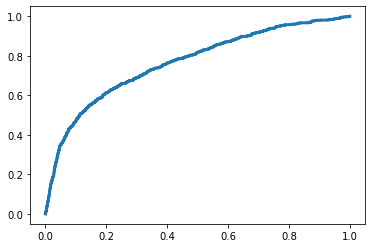

The AUC score of the ROC curve is: 0.7655644602250455


In [23]:
# Creating the ROC curve

fpr, tpr, thresholds = roc_curve(ValidationY, Y_probs)

# Dispaying the ROC curve

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fpr, tpr, linewidth=3)
plt.show()

# Finding the AUC score of the curve

AUC = roc_auc_score(ValidationY, Y_probs)
print('The AUC score of the ROC curve is:', AUC) 

## Selecting a Threshold 

Due to the description of the assignment it can be seen that the predictions of the model had an economic impact on the bank. More specifically:
- For each new applicant that receive the credit and repaid in full the bank gains £1.500.  
- For each new applicant that receive the credit and failed to repaid default the bank losses £5000. 

Based on these info, the profit for each threshold can be calculated and the threshold that maximize that profits need to be selected.

In [24]:
# Finding the thresholds that maximize the profits

prof=[]
for thres in thresholds:
    
    # Find the predictions upper of these theshold
    Y_pred = np.where(Y_probs > thres, 1, 0)
    cm = confusion_matrix(ValidationY,Y_pred)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    accur = (TN+TP)/(TN+TP+FN+TP)
    sens = (TP)/(TP+FN)
    spec = (TN)/(TN+FP)
    prec = (TP)/ (TP+FP)
    # Calculate the profit for these thresholds 
    profit= TN*1500 + FP*0 - FN*5000 + TP*0
    prof.append([thres, profit, accur, sens, spec, prec])

# Sorting the data based on thershold in order to visualisise
prof.sort(key = lambda x: x[0])
thres_df = pd.DataFrame(prof, columns=['Threshold','Profit','Accuracy','Sensitivity','Specificity','Precision'])
thres_df.head()

/var/folders/tc/r7l8s7m95pq46wn_nxhx1kcw0000gn/T/ipykernel_25177/1788320183.py:16: RuntimeWarning: invalid value encountered in long_scalars
  prec = (TP)/ (TP+FP)
/var/folders/tc/r7l8s7m95pq46wn_nxhx1kcw0000gn/T/ipykernel_25177/1788320183.py:16: RuntimeWarning: invalid value encountered in long_scalars
  prec = (TP)/ (TP+FP)


,Threshold,Profit,Accuracy,Sensitivity,Specificity,Precision
0,0.002308,1500,0.500243,1.000000,0.000265,0.214211
1,0.012120,5500,0.501455,0.999027,0.001856,0.214316
2,0.012968,7000,0.501697,0.999027,0.002121,0.214360
3,0.020216,29000,0.505769,0.998054,0.006893,0.215004
4,0.020565,30500,0.506007,0.998054,0.007158,0.215049


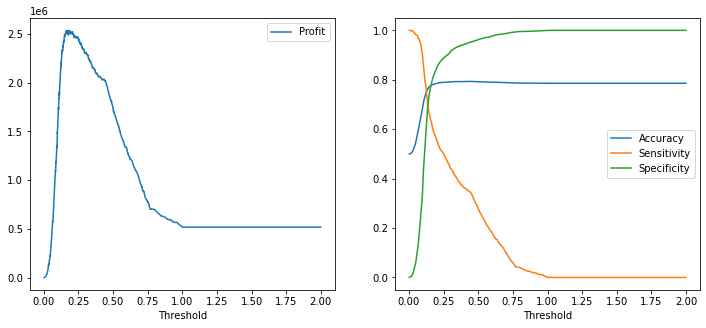

In [25]:
# Visualizing the profits along with Accuracy, Sensitivity and Specificity for each threshold

fig1 = plt.figure(figsize=(12,5))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
thres_df.plot.line(x='Threshold', y=['Profit'], ax=ax1)
thres_df.plot.line(x='Threshold' ,y=['Accuracy','Sensitivity','Specificity'], ax=ax2)
plt.show()

In [26]:
# Choosing the threshold that generate the most profit

prof.sort(key = lambda x: x[1], reverse=True)
chosen_threshold = prof[0][0]
print(chosen_threshold)
threshold_idx = np.where(thresholds == chosen_threshold)[0][0]
print(threshold_idx)

0.17229853160343922
574


In [27]:
# Finding the FPR and TPR for this Threshold:
print("At threshold  " + str(thresholds[threshold_idx]))
print("the False Positive rate is " + str(fpr[threshold_idx]))
print("the True Positive rate is " + str(tpr[threshold_idx]))

At threshold  0.17229853160343922
the False Positive rate is 0.19167550371155886
the True Positive rate is 0.6050583657587548


At Threshold: 0.17229853160343922
Predicted Profit: £ 2538500
Model's Accuracy: 0.7645833333333333
Model's Misclassification: 0.23541666666666666
Model's Specificity: 0.8083244962884412
Model's Sensitivity: 0.6040856031128404


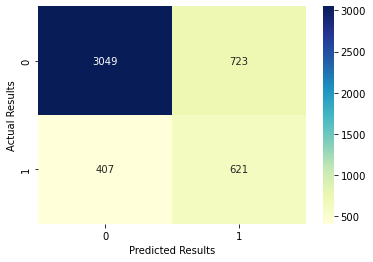

In [28]:
# Finding the predictions based on chosen threshold
Y_pred = np.where(Y_probs > chosen_threshold, 1, 0)
# Creating the confusion matrix
cm = confusion_matrix(ValidationY,Y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Visualizing the Confusion Matrix
fig1 = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual Results')
plt.xlabel('Predicted Results')
ax1.xaxis.set_label_position("top")

profits = TN*1500 + FP*0 - FN*5000 + TP*0

print("At Threshold:", chosen_threshold)
print("Predicted Profit:" ,"£",profits)
print("Model's Accuracy:", (TP+TN)/(TN+TP+FN+FP))
print("Model's Misclassification:", (FP+FN)/(TN+TP+FN+FP))
print("Model's Specificity:", TN/(FP+TN))
print("Model's Sensitivity:", TP/(TP+FN))

## Retraining the model

In [29]:
# Combining the validation and Training set to create new training set  

trainX_final=pd.concat([TrainX, ValidationX])
trainY_final=pd.concat([TrainY, ValidationY])

print(trainX_final.shape)
print(trainY_final.shape)

(19200, 33)
(19200, 1)


In [30]:
# Normalizing the columns with different orders of magnitude in the testing set

scaler = preprocessing.MinMaxScaler()
TestX[col_norm] = scaler.fit_transform(TestX[col_norm])

/Users/georgestavrakis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [32]:
# Retrainong the model with the final training set

logr_final = LogisticRegression(max_iter=1000).fit(trainX_final, trainY_final.values.ravel())

In [33]:
# Testing the model to the testing set

In [34]:
# Calculating the probabilities based on the test set
Y_test_probs=logr_final.predict_proba(TestX)[:,1]
# Assigning the selected threshold
threshold = chosen_threshold
# Predicting the values of Y
Y_test_pred=np.where(Y_test_probs > threshold, 1, 0)

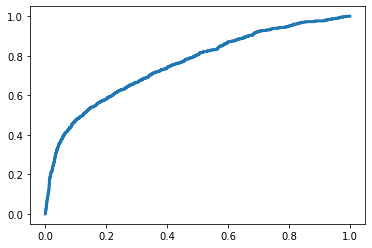

The AUC score of the ROC curve is: 0.7579796854872999


In [35]:
# Creating the ROC curve
fpr, tpr, thresholds = roc_curve(TestY, Y_test_probs)

# Dispaying the ROC curve
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fpr, tpr, linewidth=3)
plt.show()

# Finding the AUC score of the curve
AUC = roc_auc_score(TestY, Y_test_probs)
print('The AUC score of the ROC curve is:', AUC)   

At Threshold: 0.17229853160343922
Predicted Profit: £ 2118500
Model's Accuracy: 0.68
Model's Misclassification: 0.32
Model's Specificity: 0.6794219962536794
Model's Sensitivity: 0.6820319849482597


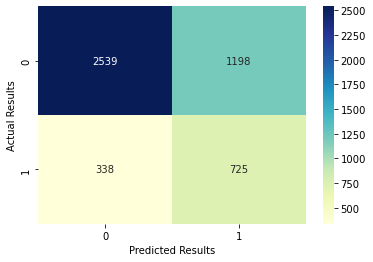

In [36]:
# Creating the confusion matrix
cm = confusion_matrix(TestY,Y_test_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Visualizing the Confusion Matrix
fig1 = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual Results')
plt.xlabel('Predicted Results')
ax1.xaxis.set_label_position("top")

profits = TN*1500 + FP*0 - FN*5000 + TP*0

print("At Threshold:", chosen_threshold)
print("Predicted Profit:" ,"£",profits)
print("Model's Accuracy:", (TP+TN)/(TN+TP+FN+FP))
print("Model's Misclassification:", (FP+FN)/(TN+TP+FN+FP))
print("Model's Specificity:", TN/(FP+TN))
print("Model's Sensitivity:", TP/(TP+FN))

# Using the Model on New Applicants

In [38]:
df_real = pd.read_csv('New_applicantions.csv')
df_real.T.head(50)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
ID,n1000-1,n1000-2,n1000-3,n1000-4,n1000-5,n1000-6,n1000-7,n1000-8,n1000-9,n1000-10,...,n1000-991,n1000-992,n1000-993,n1000-994,n1000-995,n1000-996,n1000-997,n1000-998,n1000-999,n1000-1000
LIMIT_BAL,500000,210000,150000,20000,400000,210000,30000,150000,50000,100000,...,360000,50000,230000,500000,170000,200000,50000,290000,280000,180000
SEX,1,1,1,1,1,2,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
EDUCATION,1,1,1,2,2,1,3,2,2,1,...,1,3,2,2,1,1,2,2,1,2
MARRIAGE,2,2,2,1,1,1,1,2,2,2,...,1,1,1,1,2,1,2,2,1,2
AGE,29,29,27,38,34,38,42,27,27,27,...,36,47,35,49,32,37,40,30,31,30
PAY_1,0,-2,0,0,-1,1,-1,0,3,0,...,-2,2,0,-1,0,-2,2,2,0,0
PAY_2,0,-2,0,0,-1,-2,-1,0,2,0,...,-2,2,0,-1,0,-2,0,2,0,0
PAY_3,0,-2,0,0,-1,-1,-1,0,2,0,...,-2,2,0,2,0,-2,0,0,0,0
PAY_4,0,-2,0,0,-1,0,-1,0,0,0,...,-2,0,0,-1,0,-2,2,0,0,0


## Pre-prossesing the new data

In [39]:
# Drop Unnamed: 24 column
df_real.drop(['Unnamed: 24'], axis=1, inplace=True)

In [40]:
# Replace the values of 5,6 in Education column with 0 because they denote the same Unknown info  
print('Before replace:' , df_real['EDUCATION'].unique())
df_real['EDUCATION'].replace({5 : 0, 6 : 0}, inplace=True)
print('After replace:', df_real['EDUCATION'].unique())

# Make the values of Sex 0 and 1
print('Before reduction:' , df_real['SEX'].unique())
df_real['SEX'] = df_real['SEX']- 1
print('After reduction:', df_real['SEX'].unique())

Before replace: [1 2 3 5 4 0 6]
After replace: [1 2 3 0 4]
Before reduction: [1 2]
After reduction: [0 1]


In [41]:
for i in range(1,7):
    column = 'PAY_'+str(i)
    ncol = 'DELAY_'+str(i)

    col_num = df_real[column]
    col_num = col_num.replace({-2: 0, -1: 0})
    NUM = pd.DataFrame(list(col_num), columns=[ncol])
    col_cat = df_real[column]
    col_cat = col_cat.replace({2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})
    CAT = pd.DataFrame(list(col_cat), columns=[column+'_CATEGORY'])
    if i==1:
        dfNew = pd.concat([NUM,CAT], axis=1)
    else:
        temp = pd.concat([NUM,CAT], axis=1)
        dfNew = pd.concat([dfNew, temp], axis=1)

df_real = pd.concat([df_real, dfNew], axis=1)
df_real = df_real.drop(['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)

In [42]:
# Creating Dummies for categorical variables
df_real = pd.get_dummies(df_real,drop_first=True,columns=['EDUCATION','MARRIAGE'])
df_real = pd.get_dummies(df_real,drop_first=True,columns=['PAY_1_CATEGORY','PAY_2_CATEGORY','PAY_3_CATEGORY',
                                                'PAY_4_CATEGORY','PAY_5_CATEGORY','PAY_6_CATEGORY'])

In [43]:
X = df_real.drop(['ID'],axis=1)
X = X.drop(ex_var,axis=1)

In [44]:
# Normalizing the columns with different orders of magnitude in the real dataset 
scaler = preprocessing.MinMaxScaler()
X[col_norm] = scaler.fit_transform(X[col_norm])

## Predicting default clients in the New applicants

In [45]:
X

,LIMIT_BAL,SEX,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,...,PAY_1_CATEGORY_0,PAY_2_CATEGORY_-1,PAY_3_CATEGORY_-1,PAY_3_CATEGORY_0,PAY_4_CATEGORY_-1,PAY_4_CATEGORY_0,PAY_5_CATEGORY_-1,PAY_5_CATEGORY_0,PAY_6_CATEGORY_-1,PAY_6_CATEGORY_0
0,0.700000,0,0.148148,0.734788,0.224949,0.235294,0.190754,0.100155,0.045303,0.072627,...,1,0,0,1,0,1,0,1,0,1
1,0.285714,0,0.148148,0.003972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.200000,0,0.111111,0.174795,0.016487,0.058859,0.016395,0.019992,0.005595,0.004219,...,1,0,0,1,0,1,0,1,0,1
3,0.014286,0,0.314815,0.039668,0.006949,0.008588,0.003142,0.008660,0.000494,0.000000,...,1,0,0,1,0,1,0,1,1,0
4,0.557143,0,0.240741,0.043019,0.039579,0.069806,0.039351,0.073423,0.026223,0.030127,...,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.271429,0,0.296296,0.026955,0.226139,0.147765,0.126089,0.000178,0.089311,0.227927,...,0,0,0,0,0,0,0,0,0,0
996,0.057143,0,0.351852,0.025935,0.008180,0.011765,0.005020,0.004949,0.003295,0.010549,...,0,0,0,1,0,0,0,1,0,1
997,0.400000,0,0.166667,0.540480,0.000000,0.052941,0.052708,0.084127,0.000000,0.018460,...,0,0,0,1,0,1,0,1,0,0
998,0.385714,0,0.185185,0.471622,0.036401,0.047647,0.036143,0.024743,0.016474,0.024789,...,1,0,0,1,0,1,0,1,0,1


In [46]:
# Calculating the probabilities based on the real set
Y_test_probs=logr_final.predict_proba(X)[:,1]
# Assigning the selected threshold
threshold = chosen_threshold
# Predicting the values of Y
Y_test_pred=np.where(Y_test_probs > threshold, 1, 0)

In [47]:
Y_test_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
print('Number of new applicants that defaulted:', np.count_nonzero(Y_test_pred), 'out of 1000.')

Number of new applicants that defaulted: 308 out of 1000.


In [49]:
# Creating column for recomended client's for issuing credit

Issue = []
for i in Y_test_pred:
    if i == 0: j=1
    else: j=0
    Issue.append(j)

In [50]:
Issue = pd.DataFrame({'Issue_Credit': Issue})
Issue.head()

,Issue_Credit
0,1
1,1
2,1
3,0
4,1


In [51]:
# Creating new csv with only recomentadion

Issue.to_csv('Recomendation_For_New_Applications.csv',index=False)

## Answering the Questions 2 & 3

In [52]:
Idx = [i+1 for i in range(len(Y_test_probs))]
client_prob = pd.DataFrame({'Client_index': Idx, 'Prob_to_Default': Y_test_probs}) 
client_prob.head()

,Client_index,Prob_to_Default
0,1,0.030001
1,2,0.155359
2,3,0.095406
3,4,0.179254
4,5,0.075736


Question 2 - Which three of the 1,000 pilot clients are most likely to repay the loan if it were granted to them?

In [53]:
best_clients = client_prob.sort_values('Prob_to_Default')
best_clients.head(3)

,Client_index,Prob_to_Default
673,674,0.003908
968,969,0.005172
796,797,0.006289


Question 3 - Which three of 1,000 pilot clients are least likely to repay the loan if it were granted to them?

In [54]:
best_clients.tail(3)

,Client_index,Prob_to_Default
701,702,0.962237
77,78,0.993935
149,150,0.998799
